# Provo a ritagliare i file scaricati tramite ftp

apro tutti gli nc di ogni mese, li croppo e li salvo nella cartella di lavoro


In [2]:
# import libraries for working with .nc
import xarray as xr
import os   





In [3]:


# destination path
path = 'F:/Dropbox/Dropbox/R_projects/SV_phenology/data/daily/'

In [6]:
# list files in path 1998 / 06
files = os.listdir(path + '1998')
files

['CHL_03-10_1998_10.nc',
 'CHL_03-10_1998_3.nc',
 'CHL_03-10_1998_4.nc',
 'CHL_03-10_1998_5.nc',
 'CHL_03-10_1998_6.nc',
 'CHL_03-10_1998_7.nc',
 'CHL_03-10_1998_8.nc',
 'CHL_03-10_1998_9.nc']

In [10]:
# read all nc with xarray
ds = xr.open_mfdataset(path + '1998/*.nc', combine='by_coords')


ds

<xarray.Dataset>
Dimensions:    (time: 244, latitude: 1248, longitude: 5280)
Coordinates:
  * time       (time) datetime64[ns] 1998-03-01 1998-03-02 ... 1998-10-31
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.984 -4.974 ... 49.97 49.98 49.99
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(31, 1248, 5280), meta=np.ndarray>

In [11]:
# get the spatial grid from the first layer
grid = ds.isel(time=0).drop('time')

grid


<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 5280)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.984 -4.974 ... 49.97 49.98 49.99
Data variables:
    CHL        (latitude, longitude) float32 dask.array<chunksize=(1248, 5280), meta=np.ndarray>

coarsen the dataset 

In [18]:
import numpy as np

# Define the number of rows and columns for the new grid
num_rows = 4
num_cols = 6

# Calculate the size of each row and column
row_size = ds.dims['latitude'] // num_rows
col_size = ds.dims['longitude'] // num_cols

# Define the new grid using the coarsen method
new_grid = ds.coarsen(latitude=row_size, longitude=col_size)

# Calculate the mean CHL value in each sector (ignoring NaN values in the mean)
mean_chl = new_grid.mean(skipna=True)['CHL'].values

# Count the number of non-NaN pixels in each sector
num_pixels = new_grid.count()['CHL'].values

# Combine the mean CHL value and the number of pixels into a new xarray dataset
new_dataset = xr.Dataset(
    data_vars={
        'mean_CHL': (('time', 'row', 'col'), mean_chl),
        'num_pixels': (('time', 'row', 'col'), num_pixels)
    },
    coords={
        'time': ds['time'],
        'row': np.arange(num_rows),
        'col': np.arange(num_cols)
    }
)

C:\Users\matteo\AppData\Local\Temp\ipykernel_26776\3291795435.py:15: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  mean_chl = new_grid.mean(skipna=True)['CHL'].values
C:\Users\matteo\AppData\Local\Temp\ipykernel_26776\3291795435.py:18: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>

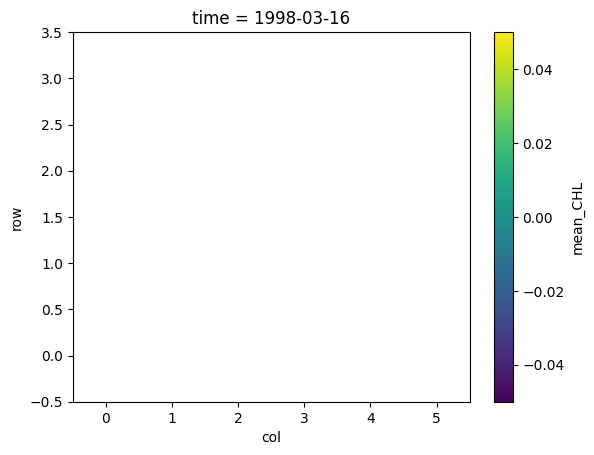

In [19]:
# plot the mean CHL value aw maps for each time step of june, using coordinates from the new grid

new_dataset['mean_CHL'].isel(time=15).plot()

In [12]:
# loop for each year within 1998 and 2022
for year in range(1998,2023):
    # loop for each month within march and october

    # create a folder for each year
    #os.mkdir(outp + '{}'.format(year))

    for month in range(10, 11):
        # temp path concatenate folder for year and month (e.g. 1998/03), with month in two digits
        tpath = 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/{:04d}/{:02d}'.format(year,month)


        # list all files
        files = [os.path.join(tpath, f) for f in os.listdir(tpath)]

        # use xarray to stack all files in files
        ds = xr.open_mfdataset(files, combine='by_coords')

        # subset with latitudes 
        ds_subset = ds.sel(latitude=slice(latmax, latmin), longitude=slice(lonmin, lonmax))

        

        # subset only CHL values to save
        ds_subset = ds_subset['CHL']

        # set consistent _FillValue and missing_value attributes for the 'CHL' variable
        encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}

        # save the subset to a NetCDF file with the updated encoding (nome file= outp + year + 'CHL_03-10_{}_.nc'.format(year))
        ds_subset.to_netcdf(outp + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month), encoding=encoding)
               


        # plot the subset title='CHL_03-10_{}'.format(year) title='CHL_03-10_{}_{}'.format(year, month)
        #ds_subset.plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=0.5, size=3, aspect=1.5)


        # close the dataset
        ds.close()

        # close the subset
        ds_subset.close()

        # print the year and month
        print(year, month)
        




 

1998 10
1999 10
2000 10
2001 10
2002 10
2003 10
2004 10
2005 10
2006 10
2007 10
2008 10
2009 10
2010 10
2011 10
2012 10
2013 10
2014 10
2015 10
2016 10
2017 10
2018 10
2019 10
2020 10
2021 10
2022 10
